# Basic Games

# Iterated Prisoner's Dilemma
Prisoner's Dilemma is a pretty standard game that is commonly used in game theory (for a comprehensive defintion of Prisoner's dilemma see this [link](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma)). Iterated Prisoner's Dilemma is simply repeating the game and allowing the agents to choose again. Prisoner's Dilemma is implemented in a module I wrote called game_types. For an example using the PrisonersDilemma class see the pseudocode snippet below (I dicuss different types of strategies availiable in subsequent cells):
```python
from game_types import PrisonersDilemma
...
...
...
agent1 = Strategy() # Some Strategy for agent1
agent2 = Strategy() # Some Strategy for agent2
game = PrisonersDilemma(agent1, agent2) # Play Prisoners Dilemma with agent1 and agent2
num_iter = 10000 # Play the game 10000 times
game.play(num_iter)
data = game.data # grab data from game
```

## Scenario - TCP User's Game

In this scenario [Robert Brunner](http://www.astro.illinois.edu/people/bigdog) uploads a dataset and asks two graduate students [Edward](https://edwardjkim.github.io/) and [Will](http://publish.illinois.edu/wbiscarri/) to download and perform a variety of tasks. For the sake of simplicity in this game Edward and Will are the only ones on a special network and they recieve no interference from other people.

The traffic for this network is governed by the TCP Protocol and one feature of TCP is the backoff mechanism. If the rates that Edward and Will are sending packets to this network causes congestion they (`backoff` and) each reduce the rate for a while until network congestion subsides. This is the correct implementation. A defective implementation of TCP would be one that does not backoff if the network is congested. The users in this game have 2 choices. To Cooperate (use the correct implementation of the TCP protocol) or to defect (use an incorrect implementation of the TCP protocol).

The payoff matrix is below. The numbers in the box are the utility values. For this example the higher the utlity value the faster the dataset is downloaded. Will is the first player and is the first number in each box. Edward is the second player and is the the second number in each box. 

If Edward and Will follow the correct protocol they will both download the dataset in a reasonable amout of time (top left). If Will decides he wants the data faster and uses a defective TCP protocol while Edward still follows the correct protocol Will downloads the dataset much faster than Edward (Top Right). Vise-versa (bottom left). If they both defect they download the dataset significantly slower than if they both cooperated.
![Game Theory TCP Example](http://i.imgur.com/hfWBE27.png)

## Types of Strategies

The strategies of Will and Edward will depend on what they want to achieve. Edward's part may be based on Will's work so it would make sense for Will to defect and Edward cooperates on purpose. If it's a competition they may try to defect to get a head start. If both split up the work then it may be in there interest to Cooperate. There are a lot of scenarios that can unfold but in most games agents do not know the other agents intentions or strategies so for the sake of this game we assume Edward and Will know nothing about it.

I've implemented the following basic strategies in a directory called strategies:

### Cooperate
Cooperate: With this strategy Will or Edward (the agent) always cooperates. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import cooperate as c
agent = c.Cooperate()
```
### Defect
Defect: With this strategy the agent always defects. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import defect as d
agent = d.Defect()
```
### Chaos
Chaos: An agent uses this strategu to cause chaos by cooperating or defecting at random. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import chaos as ch
agent = ch.Chaos()
```
### Grim
Grim: This strategy is the most unforgiving. The agent cooperates until the opponent defects, in which case it will defect for the remainder of the game. This is also known as a trigger strategy. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import grim as g
agent = g.Grim()
```
### Pavlov
Pavlov: This is another trigger strategy where initally the agent will cooperate until it loses then it will change it's strategy (defect). The agent will continue to change it's strategy if it loses. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import pavlov as p
agent = p.Pavlov()
```
### Q-Learning
Q-Learning: This agent uses [Q-learning](https://en.wikipedia.org/wiki/Q-learning) for it's strategy where Q Learning is a model-free reinforcement learning technique. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import machine_learning as ml
agent = ml.QLearn()
```
### Human
Human: This agent recieves the action as input from a human player. To create an agent that uses this strategy you can do the following in Python:
```python
from strategies import human as h
agent = h.Human()
```

In [1]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Importing Games
from game_types import PrisonersDilemma
from game_types import Coordination

# Importing Strategies
from strategies import chaos as c
from strategies import defect as d
from strategies import machine_learning as ml
from strategies import pavlov as p
from strategies import grim as g


# Simulating Games:
## Chaos VS Defect

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 20385.03it/s]


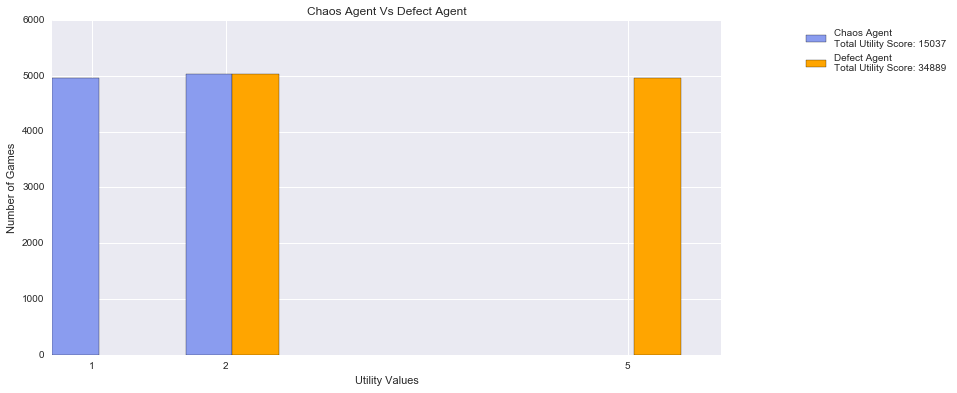

In [2]:
# Create agents and play the game for 10000 iteratations
agent1 = c.Chaos()
agent2 = d.Defect()
game = PrisonersDilemma(agent1, agent2)
game.play(10000)

# Grab Data
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])

a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('Chaos Agent Vs Defect Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add([1,2,5],width-.05))
_ = ax.set_xticklabels(('1', '2', '5'))
_ = ax.legend((a1[0], a2[0]), ('Chaos Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Defect Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

In this scenario defecting is the [domiant strategy](https://en.wikipedia.org/wiki/Strategic_dominance). Where the agent is better off defecting no matter what other agents do.

## Grim VS Pavlov

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 15135.32it/s]


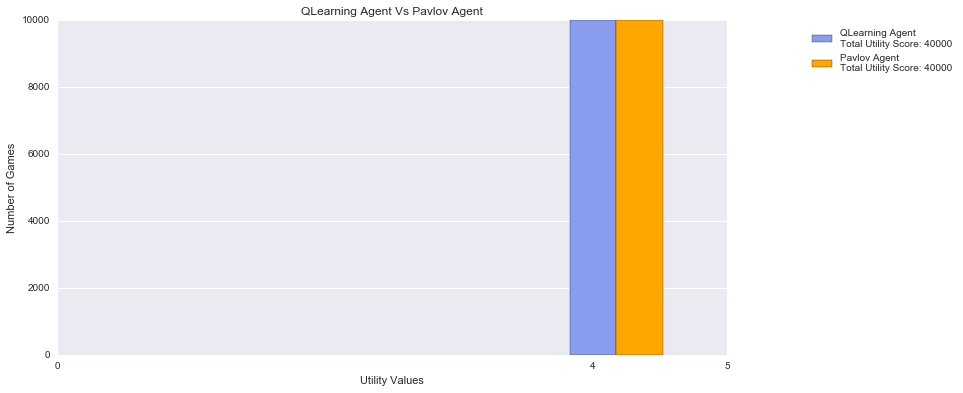

In [3]:
# play the game
agent1 = g.Grim()
agent2 = p.Pavlov()
game = PrisonersDilemma(agent1, agent2)
game.play(10000)

# get data from game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])

a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])

# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('Grim Agent Vs Pavlov Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add([0,4,5],width/2))
_ = ax.set_xticklabels(('0', '4', '5'))
_ = ax.legend((a1[0], a2[0]), ('Grim Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Pavlov Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

Both strategies start out cooperating, Grim never defects because pavlov never defects. Pavlov never loses a round so it doesn't change it's strategy.

## Q-Learning VS Pavlov

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 12552.94it/s]


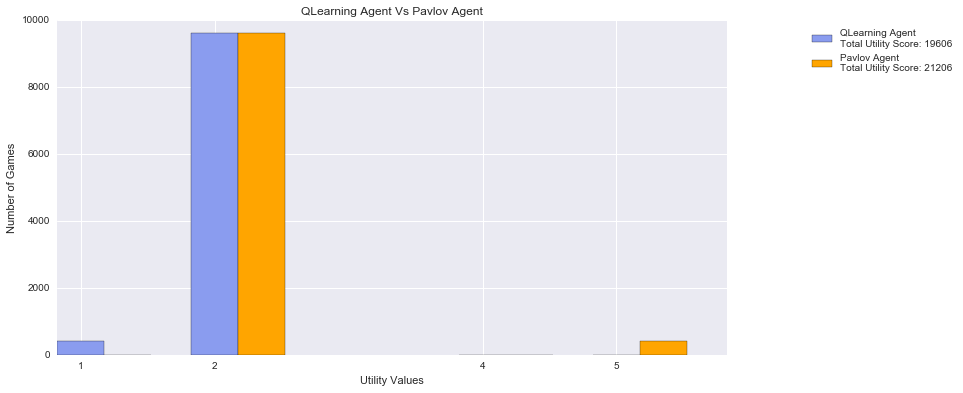

In [4]:
# Play the Game
agent1 = ml.QLearn()
agent2 = p.Pavlov()
game = PrisonersDilemma(agent1, agent2)
game.play(10000)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])

a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])

# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs Pavlov Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add([1,2,4,5],width/2))
_ = ax.set_xticklabels(('1', '2', '4', '5'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Pavlov Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()


Pavlov's simple rules out performs Q Learning here which is interesting.

In [5]:
print(agent1_util_vals, agent2_util_vals)

Counter({2: 9596, 1: 401, 4: 2, 5: 1}) Counter({2: 9596, 5: 401, 4: 2, 1: 1})


## Q-Learning VS Chaos

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 15111.22it/s]


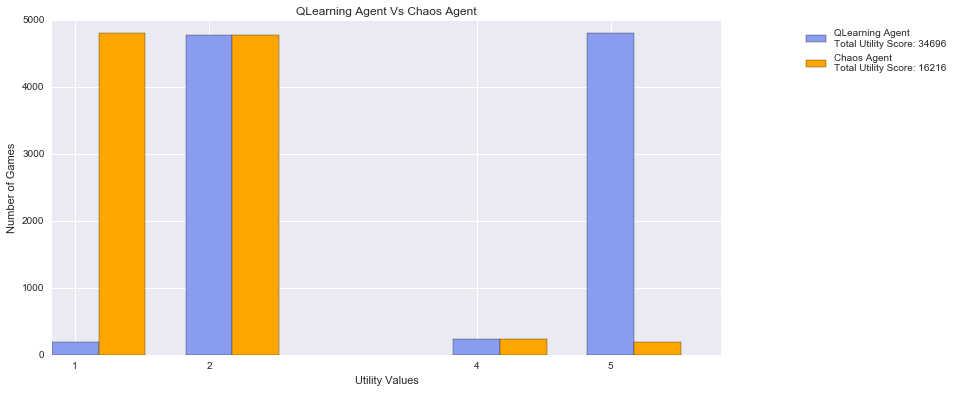

In [6]:
# Play the Game
N = 10000
agent1 = ml.QLearn()
agent2 = c.Chaos()
game = PrisonersDilemma(agent1, agent2)
game.play(N)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])
a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs Chaos Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add(x2,width/2))
_ = ax.set_xticklabels(('1', '2', '4', '5'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Chaos Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()


Q Learning significantly outperforms the Chaos Agent because the Q Learning Agent learns pretty quickly that defecting yields the highest expected utility (talked about more in appendix).

## Q Learning VS Q Learning

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 10919.34it/s]


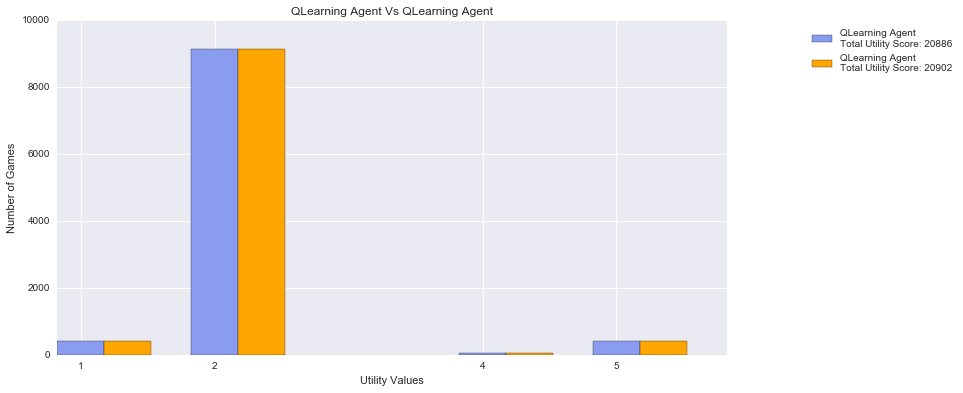

In [7]:
# Play the Game
N = 10000
agent1 = ml.QLearn()
agent2 = ml.QLearn()
game = PrisonersDilemma(agent1, agent2)
game.play(N)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])
a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs QLearning Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add(x2,width/2))
_ = ax.set_xticklabels(('1', '2', '4', '5'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'QLearning Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

Here both QLearning Agents tend to mirror each other. I assume this is because they have the same inital parameters which will yield the same expected utility.

## QLearning Vs QLearning (Longer Game; Different Starting Parameters)

Playing Game: 100%|██████████| 200000/200000 [03:44<00:00, 890.01it/s] 


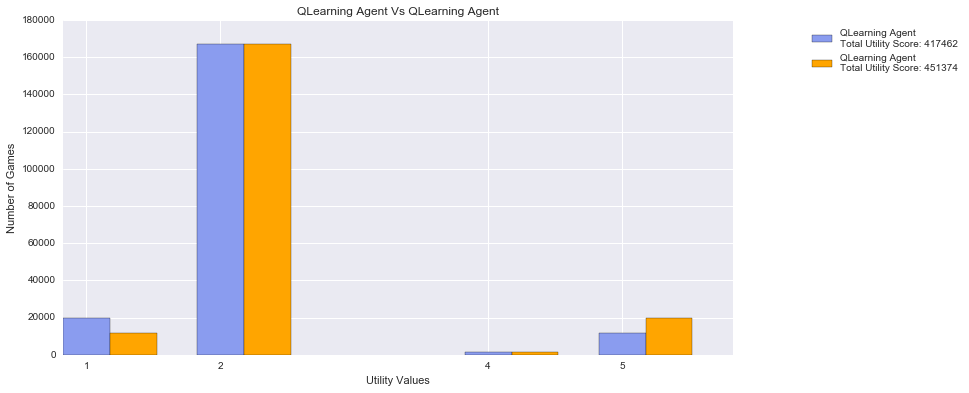

In [8]:
# Play the Game
N = 200000  # Play a longer game
# agent 1's parameters are bit more short sighted
agent1 = ml.QLearn(decay=0.4, lr=0.03, explore_period=30000, explore_random_prob=0.4, exploit_random_prob=0.2)
# agent 2's parameters think more about the future
agent2 = ml.QLearn(decay=0.6, lr=0.2, explore_period=40000, explore_random_prob=0.4, exploit_random_prob=0.1)
game = PrisonersDilemma(agent1, agent2)
game.play(N)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])
a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs QLearning Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add(x2,width/2))
_ = ax.set_xticklabels(('1', '2', '4', '5'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'QLearning Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

(I haven't had the time to look through the actions of both agents but one is short sighted and the other is not, which yields the Orange QLearning agent a higher total utility score.)

In [9]:
print(agent1_util_vals, agent2_util_vals)

Counter({2: 167016, 1: 20014, 5: 11536, 4: 1434}) Counter({2: 167016, 5: 20014, 1: 11536, 4: 1434})



# Iterated Coordination Game
## Scenario - Choosing Movies

In this scenario [Vincent](https://www.linkedin.com/in/vincent-reverdy/) and [Maghav](https://www.linkedin.com/in/maghavkumar/) want to see different movies. Vincent wants to see Guardians of the Galaxy 2 and Maghav wants to see Wonder Woman. They are willing to go see the movie that don't really care for but they both don't want to go see a movie alone. They both have 2 choices to defect (see the other persons movie person), or to cooperate go and see the movie they want. 
The payoff matrix is below:

![Game Theory Movie Example](http://i.imgur.com/t5LgITv.png)



## Chaos VS Defect

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 21936.61it/s]


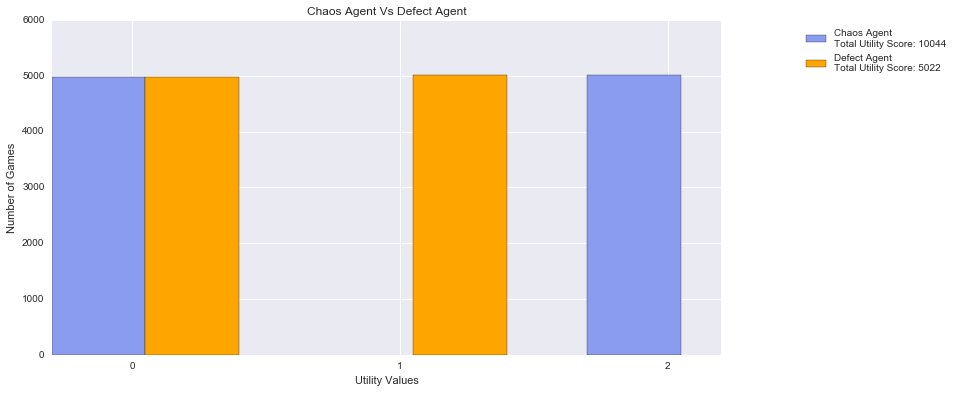

In [10]:
# Create agents and play the game for 10000 iteratations
agent1 = c.Chaos()
agent2 = d.Defect()
game = Coordination(agent1, agent2)
game.play(10000)

# Grab Data
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])

a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('Chaos Agent Vs Defect Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add([0,1, 2],width-.05))
_ = ax.set_xticklabels(('0','1','2'))
_ = ax.legend((a1[0], a2[0]), ('Chaos Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Defect Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

Here Defect isn't a domiant strategy. The defect agent only recieves a non 0 utility value if the chaos agent sees the  movie they intended to see. A Mixed Strategy is needed.

In [11]:
print(agent1_util_vals,agent2_util_vals)

Counter({2: 5022, 0: 4978}) Counter({1: 5022, 0: 4978})


## Grim VS Pavlov

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 16447.37it/s]


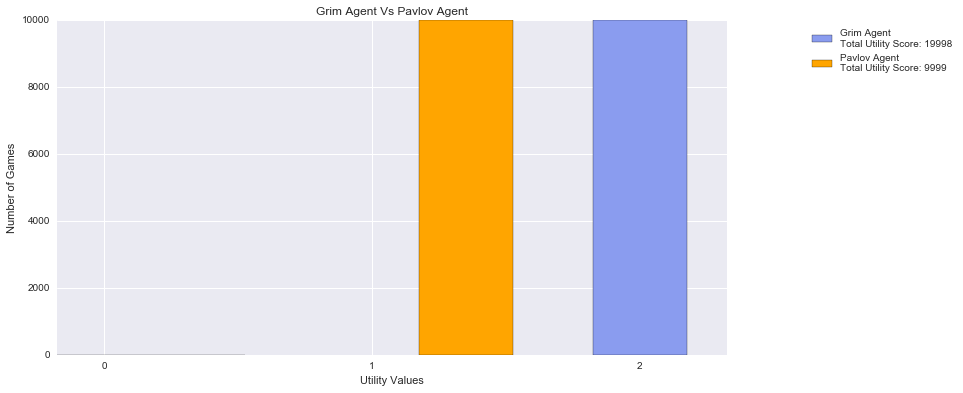

In [23]:
# play the game
agent1 = g.Grim()
agent2 = p.Pavlov()
game = Coordination(agent1, agent2)
game.play(10000)

# get data from game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])

a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])

# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('Grim Agent Vs Pavlov Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add([0,1,2],width/2))
_ = ax.set_xticklabels(('0', '1', '2'))
_ = ax.legend((a1[0], a2[0]), ('Grim Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Pavlov Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

Grim loses in the first round and always goes to other movie, the Pavlov Agent even won a round where they both ended up at the same movie and never changed it's strategy.

In [21]:
print(agent1_util_vals, agent2_util_vals)

Counter({2: 9999, 0: 1}) Counter({1: 9999, 0: 1})


## Q-Learning Vs Chaos

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 15487.86it/s]


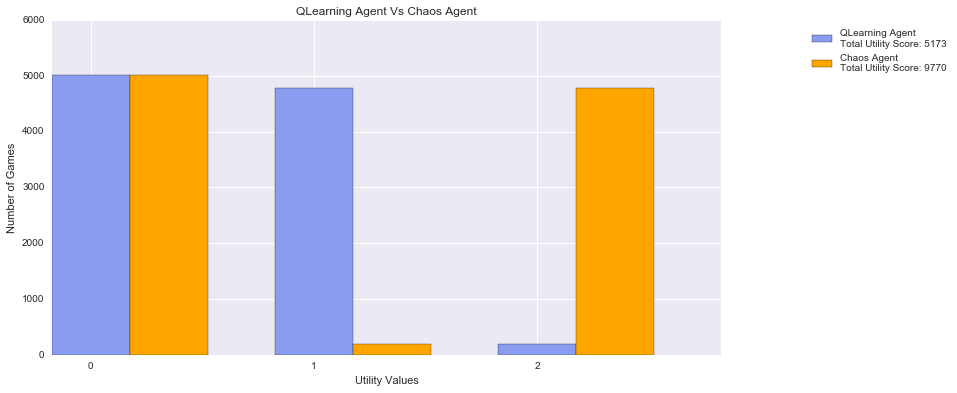

In [22]:
# Play the Game
N = 10000
agent1 = ml.QLearn()
agent2 = c.Chaos()
game = Coordination(agent1, agent2)
game.play(N)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])
a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs Chaos Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add(x2,width/2))
_ = ax.set_xticklabels(('0', '1', '2'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'Chaos Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

This is different from Prisoner's Dilema, the QLearning Agent is trying to cooperate with the chaos agent but can never predict which movie he is going to.

## QLearning Vs QLearning

Playing Game: 100%|██████████| 10000/10000 [00:00<00:00, 10869.86it/s]


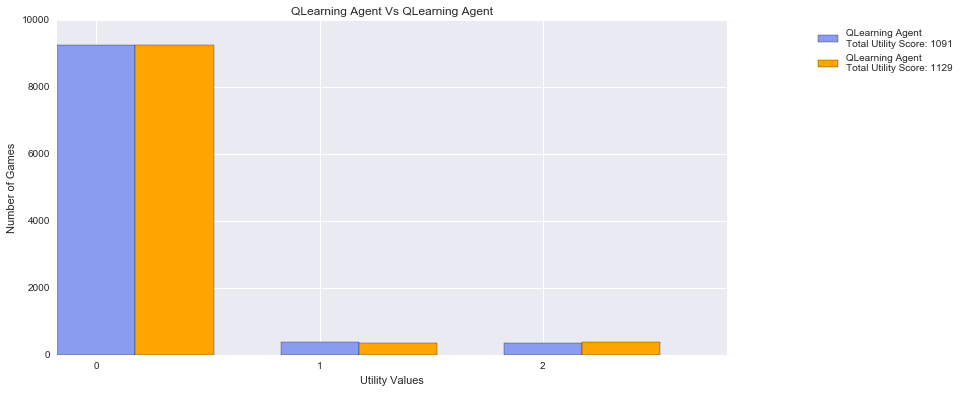

In [19]:
# Play the Game
N = 10000
agent1 = ml.QLearn()
agent2 = ml.QLearn()
game = Coordination(agent1, agent2)
game.play(N)

# Get Data from Game
agent1_util_vals = Counter(game.data['A'])
agent2_util_vals = Counter(game.data['B'])
a1_total_score = sum(game.data['A'])
a2_total_score = sum(game.data['B'])


# Plot the results
x1, y1, x2, y2 = [], [], [], []

for i, j in zip(agent1_util_vals, agent2_util_vals):
    x1.append(i)
    y1.append(agent1_util_vals[i])
    x2.append(j)
    y2.append(agent2_util_vals[j])

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
a1 = ax.bar(x1, y1, width, color='#8A9CEF')
a2 = ax.bar(np.asarray(x2)+width, y2, width, color='orange')

_ = ax.set_title('QLearning Agent Vs QLearning Agent')
_ = ax.set_ylabel('Number of Games')
_ = ax.set_xlabel('Utility Values')
ax.set_xticks(np.add(x2,width/2))
_ = ax.set_xticklabels(('0','1', '2'))
_ = ax.legend((a1[0], a2[0]), ('QLearning Agent\nTotal Utility Score: {}'.format(str(a1_total_score)),
                           'QLearning Agent\nTotal Utility Score: {}'.format(str(a2_total_score))), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()

Still playing around with this one, but both do pretty bad here.

In [16]:
print(agent1_util_vals, agent2_util_vals)

Counter({0: 9243, 1: 387, 2: 370}) Counter({0: 9243, 2: 387, 1: 370})


# Next Up?
#### Immediately: more reading, Deep QLearning, more advanced games, N>2 player games
#### Later: more reading, develop games (mechanism design) given data (Cool Paper entitled [Mechanism Design for Data Science](https://arxiv.org/abs/1404.5971)), apply other deep learning models that I learn about to games
#### Much Later: more reading, apply to some financial applications

# Appendix
### A Few Cool Things about Q Learning:
- Q Learning a model-free reinforcement learning technique
- model free meaning it doesn't a need a model of the environment to determine the next action to take. It makes pretty good choices with it's action value function. This is useful for large complex environments where the rules of the environment aren't all known.
- The action value function will find expected utility of an action in a given state.
- A correctly implemented Q Learning model will follow a policy (set of rules) for choosing the best action, in this case the action that gives the highest expected utility.
- The expected utility for each state determined by using the following update rule
![Update Rule](https://wikimedia.org/api/rest_v1/media/math/render/svg/7a2a11876f4a2bef1198beb780a769cfa5c21af3)
- the discount factor determines the importance for future rewards. The closer the discount factor is 0 the more short sighted it is.


### Some topics in Game Theory that were indirectly dicussed above but not formally defined:
- Both games above are two player normal form games. This is where a normal form game is a finite valued player game.
- The Payoff Matrix is a common way to represent normal formed games.
- The agents use a utility function which maps the states of the world around around them to real numbers. In the TCP example the utility values (numbers) are the download the rates. The rates may be significantly different and have units associated with them but for each action and state the numbers will be relative to there real values. Ergo in the TCP example dicussed above if one person doesn't follow the TCP protocol and another does, the download rates will be faster than the person who has reduced the number of packets it is sending/recieving. 
- A Nash Equilbrium is a stable state where no agent can gain a better outcome if the strategies of other agents remain unchanged.
- In the Prisoner's Dilemma Game the Nash Equilbrium for both players is to defect.
- In the Coordination Game 2 Nash Equilbriums exist, both agents going to the either movie as long as it the same.